# Tutorial 2: PyTorch Basics

Topics:
- (5 min) Part 1: Tensor Operations
- (10 min) Part 2: Autograd: Automatic differentiation
- (15 min) Part 3: Optimize a function with gradient descent based on Autograd
- (15 min) Part 4: Binary classification example
- (5 min) Q&A

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim   # Optimizer: SGD, Adam
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Tensor Operations

In [21]:
# Create tensors from list
data_list = [1.0, 2.0, 3.0]
x = torch.tensor(data_list)
x

tensor([1., 2., 3.])

In [22]:
# Create tensors from numpy array
# Pay attention to the data dtype torch.float64, different from x.
y_np = np.array(data_list)
y = torch.from_numpy(y_np)
y

tensor([1., 2., 3.], dtype=torch.float64)

In [23]:
# Basic operations
print("Addition: ", x + y)

Addition:  tensor([2., 4., 6.], dtype=torch.float64)


In [24]:
print("Element-wise Multiplication: ", x * y)

Element-wise Multiplication:  tensor([1., 4., 9.], dtype=torch.float64)


In [25]:
# Common mistakes: dot product on different data types
# RuntimeError: dot : expected both vectors to have same dtype, but found Float and Double
print("Dot product: ", torch.dot(x, y))  

RuntimeError: dot : expected both vectors to have same dtype, but found Float and Double

In [7]:
print("x.dtype:", x.dtype)
print("y.dtype:", y.dtype)


x.dtype: torch.float32
y.dtype: torch.float64


In [26]:
# Convert tensor x's data type to the same type of tensor y
x = x.to(y.dtype)
print("x.dtype:", x.dtype)

# Now we can do dot product without error
print("Dot product: ", torch.dot(x, y))

x.dtype: torch.float64
Dot product:  tensor(14., dtype=torch.float64)


In [9]:
# Different ways of doing dot product
print("torch.dot(x, y): ", torch.dot(x, y))
print("x @ y: ", x @ y)

torch.dot(x, y):  tensor(14., dtype=torch.float64)
x @ y:  tensor(14., dtype=torch.float64)


In [10]:
# Reshaping tensors
a = torch.randn(2, 3)
print("Original Tensor:\n", a)

b = a.view(3, 2)
print("Reshaped Tensor by view:\n", b)

Original Tensor:
 tensor([[ 1.0268, -0.2133, -1.4358],
        [-0.3059,  0.4686, -0.5056]])
Reshaped Tensor by view:
 tensor([[ 1.0268, -0.2133],
        [-1.4358, -0.3059],
        [ 0.4686, -0.5056]])


In [11]:
c = a.reshape(3, 2)
print("Reshaped Tensor by reshape:\n", c)

# b and c are equal
print("Are b and c equal?", torch.allclose(b, c))

Reshaped Tensor by reshape:
 tensor([[-0.8293,  2.9826],
        [-0.0850, -0.0329],
        [ 0.1407, -1.3769]])
Are b and c equal? True


In [12]:
# Transpose
d = a.t()
print("Reshaped Tensor by transpose:\n", d)
print("Are c and d equal?", torch.allclose(c, d))

Reshaped Tensor by transpose:
 tensor([[-0.8293, -0.0329],
        [ 2.9826,  0.1407],
        [-0.0850, -1.3769]])
Are c and d equal? False


In [13]:
print("mean of all tensor entries", a.mean())
print("mean of tensor entries along axis=0", a.mean(axis=0))
print("mean of tensor entries along axis=1", a.mean(axis=1))

mean of all tensor entries tensor(0.1332)
mean of tensor entries along axis=0 tensor([-0.4311,  1.5617, -0.7310])
mean of tensor entries along axis=1 tensor([ 0.6894, -0.4230])


In [14]:
print("sum of all tensor entries", a.sum())
print("sum of tensor entries along axis=0", a.sum(axis=0))
print("sum of tensor entries along axis=1", a.sum(axis=1))

sum of all tensor entries tensor(0.7992)
sum of tensor entries along axis=0 tensor([-0.8622,  3.1233, -1.4620])
sum of tensor entries along axis=1 tensor([ 2.0683, -1.2691])


# Part 2: Autograd: Automatic differentiation

## Simple example: y = x^2

In [15]:
# Create a tensor that requires gradient computing
x = torch.tensor(1.0, requires_grad=True)

In [16]:
# function example: y = x^2


# Clear previous gradients, if exists
if x.grad is not None:
    x.grad.zero_()  # All PyTorch methods ending in underline _ are in-place operation.


# Forward propagation
y = x ** 2

# Backward propagation
y.backward()

# Fetch gradient
gradient = x.grad


print(f"dy/dx @x=1: {gradient}")

dy/dx @x=1: 2.0


## Dynamically tracing the computation

In [15]:
# PyTorch traces your computation by building a dynamic graph
# function example: z = x + y = x + x^2
x = torch.tensor(1.0, requires_grad=True)
y = x ** 2
y.retain_grad()
z = x + y
z.backward()
print(f"dz/dx @x=1: {x.grad}")

dz/dx @x=1: 3.0


In [16]:
y.grad

tensor(1.)

In [17]:
# Autograd also works for multi-variables
# y = 2*x0 + 3 (x1)^2
# dy/dx0 = 2
# dy/dx1 = 6x1

x = torch.tensor([1.0, 1.0], requires_grad=True)
y = 2*x[0] + 3 * (x[1] ** 2)
y.backward()
print(f"dy/dx @x=1 for nested function: {x.grad}")


dy/dx @x=1 for nested function: tensor([2., 6.])


# Part 3: Optimize a squared function gradient descent via Autograd

In [138]:
def dummy_loss_function(x):
    '''
    x: a tensor that x.requires_grad=True
    '''

    l = (x[0]-3) ** 2 + (x[1]-5) ** 2

    return l

In [139]:
x = torch.tensor([1.0, 1.0], requires_grad=True)

# x.grad.zero_()
dummy_loss_function(x).backward()

x.grad

tensor([-4., -8.])

### Manually update variables

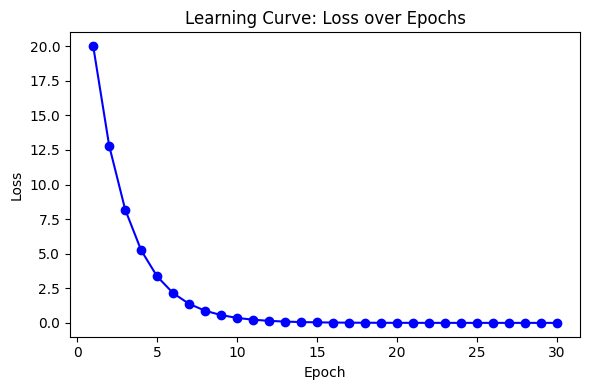

Optimized x: tensor([2.9975, 4.9950], requires_grad=True) (Analytical solution is x=[3, 5])


In [204]:
# Initialize the variables
x = torch.tensor([1.0, 1.0], requires_grad=True)
learning_rate = 0.1
num_epoch = 30

loss_values = []

# Perform gradient descent for num_epoch iterations
for _ in range(num_epoch):
    loss = dummy_loss_function(x)
    loss.backward()

    # Turn off tracing the computation using "with torch.no_grad()"
    with torch.no_grad():
        # Apply gradient descent manually
        x -= learning_rate * x.grad
        x.grad.zero_()

    # Record loss value
    loss_values.append(loss.item())

# Generate the plots
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# Plot learning curve (loss over epochs)
ax1.plot(range(1, num_epoch+1), loss_values, marker='o', linestyle='-', color='b')
ax1.set_title('Learning Curve: Loss over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
plt.tight_layout()
plt.show()

print(f"Optimized x: {x} (Analytical solution is x=[3, 5])")

### Automatically update variables via PyTorch Optimizers

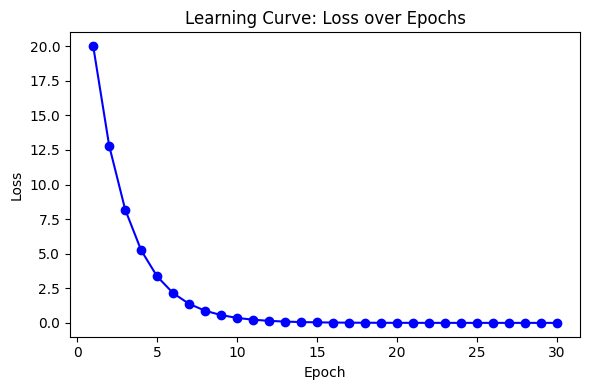

Optimized x: tensor([2.9975, 4.9950], requires_grad=True) (Analytical solution is x=[3, 5])


In [166]:
# Initialize x as a tensor with requires_grad=True
x = torch.tensor([1.0, 1.0], requires_grad=True)
num_epoch = 30

# Define the SGD optimizer
optimizer = torch.optim.SGD([x], lr=0.1)

# Store values for plotting
loss_values = []

# Optimization loop using the optimizer
for epoch in range(num_epoch):
    # Zero the gradients from the previous step
    optimizer.zero_grad()

    # Compute the loss
    loss = dummy_loss_function(x)
    
    # Backpropagate the gradients
    loss.backward()

    # Update the value of x using the optimizer
    optimizer.step()

    # Record loss value
    loss_values.append(loss.item())

# Generate the plots
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# Plot learning curve (loss over epochs)
ax1.plot(range(1, num_epoch+1), loss_values, marker='o', linestyle='-', color='b')
ax1.set_title('Learning Curve: Loss over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
plt.tight_layout()
plt.show()

print(f"Optimized x: {x} (Analytical solution is x=[3, 5])")


# Part 4: Binary Classification using Neural Networks

## Generate Synthetic Data

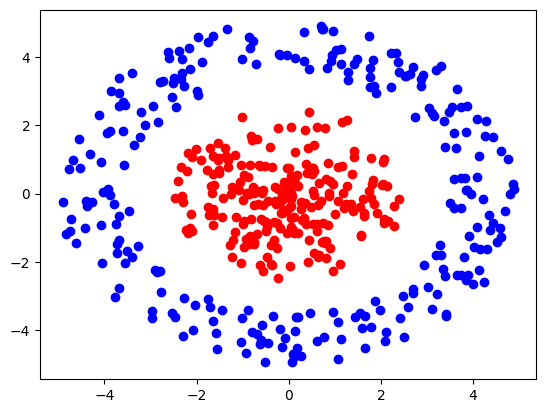

In [158]:
def make_dataset(N):
    radius = 5
    X = torch.zeros((N, 2))
    y = torch.zeros(N)
    
    # Inner
    r = torch.distributions.Uniform(0, radius*0.5).sample([1, N // 2])
    angle = torch.distributions.Uniform(0, 2*np.pi).sample([1, N // 2])
    X[:N // 2, 0] = r * torch.cos(angle)
    X[:N // 2, 1] = r * torch.sin(angle)
    y[:N // 2] = 1

    # Outer

    r = torch.distributions.Uniform(radius*0.7, radius).sample([1, N // 2])
    angle = torch.distributions.Uniform(0, 2*np.pi).sample([1, N // 2])
    X[N // 2:, 0] = r * torch.cos(angle)
    X[N // 2:, 1] = r * torch.sin(angle)
    y[N // 2:] = 0
    
    return X, y

N = 500
X, y = make_dataset(N)

# Red labels are 1, blue labels are 0
plt.scatter(X[:N // 2, 0], X[:N // 2, 1], color='red')
plt.scatter(X[N// 2:, 0], X[N//2:, 1], color='blue')
plt.show()

## Build Classifier Model (Neural Network)

In [185]:
# nn.Module Brief Explanation:
# nn.Module is a base class for all neural network modules.
# Custom models are usually created by subclassing nn.Module and defining layers in the __init__ method.
# The forward method defines how data is passed through the layers.


class BinaryClassifier(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=3, output_dim=1):
        super(BinaryClassifier, self).__init__()

        # fully connected layer
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)

    # Override the forward method in nn.Module
    def forward(self, x):
        y1 = torch.tanh(self.layer1(x))
        y2 = torch.sigmoid(self.layer2(y1))
        return y2

In [ ]:
# Equivalent definition to the BinaryClassifier class above, using nn.Sequential()
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=3, output_dim=1):
        super(BinaryClassifier, self).__init__()

        # Define the model using nn.Sequential
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),   # Fully connected layer 1
            nn.Tanh(),                          # Activation function (Tanh)
            nn.Linear(hidden_dim, output_dim),   # Fully connected layer 2
            nn.Sigmoid()                        # Activation function (Sigmoid)
        )

    # Override the forward method in nn.Module
    def forward(self, x):
        return self.model(x)

In [203]:
for p in BinaryClassifier().parameters():
    print(p)

Parameter containing:
tensor([[ 0.3716, -0.4212],
        [ 0.0597, -0.3240],
        [-0.2242,  0.6299]], requires_grad=True)
Parameter containing:
tensor([0.5058, 0.6293, 0.6438], requires_grad=True)
Parameter containing:
tensor([[ 0.5362,  0.2605, -0.1969]], requires_grad=True)
Parameter containing:
tensor([-0.4801], requires_grad=True)


## Training pipeline

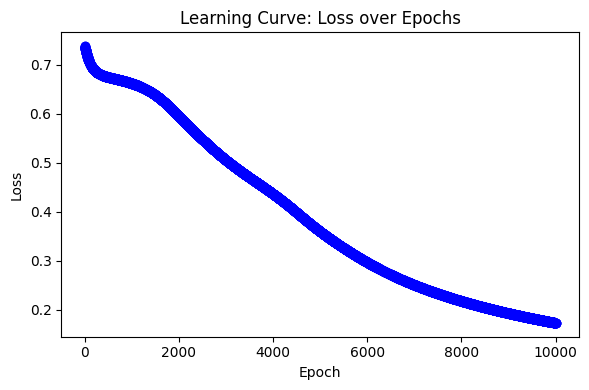

Training complete


In [198]:
# Prepare datasets
X, y = make_dataset(N=500)

# Create prediction model instance
model = BinaryClassifier()

# create binary cross entropy loss
criterion = nn.BCELoss()

# create an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epoch = 10000

loss_values = []

# Training loop
for epoch in range(num_epoch):
    model.train()  # set to train mode: requires_grad=True

    # clears previous gradient
    optimizer.zero_grad()
    
    # Forward propagation
    output = model(X).squeeze()
    loss = criterion(output, y)
    
    # Backward propagation
    loss.backward()

    # Update weights
    optimizer.step()
        
    # Record loss value
    loss_values.append(loss.item())

# Generate the plots
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# Plot learning curve (loss over epochs)
ax1.plot(range(1, num_epoch+1), loss_values, marker='o', linestyle='-', color='b')
ax1.set_title('Learning Curve: Loss over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
plt.tight_layout()
plt.show()

print("Training complete")

## Plot decision boundary of the learned classifier

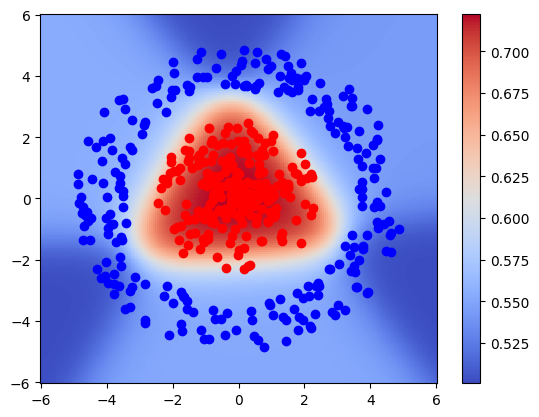

In [206]:
num_points = 200
x1s = torch.linspace(-6.0, 6.0, num_points)
x2s = torch.linspace(-6.0, 6.0, num_points)

X1, X2 = torch.meshgrid(x1s, x2s, indexing="ij")
points = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)

Y = torch.sigmoid(model(torch.Tensor(points)))
# Y = model(torch.Tensor(points))
Y = Y.detach().numpy().reshape(num_points, num_points)

plt.pcolormesh(X1, X2, Y, cmap=plt.colormaps['coolwarm'])
plt.colorbar()
plt.scatter(X[:N // 2, 0], X[:N // 2, 1], color='red')
plt.scatter(X[N// 2:, 0], X[N//2:, 1], color='blue')
plt.show()